## Exercise:

1. Make a 10 second recording using a portable computer and the built in microphone and sound card. What is the sampling frequency and amplitude resolution of the audio signal recorded?

After receiving the audio properties the sampling frequency is found to be 48.000 Hz (48.0 kHz).
The amplitude resolution is a 64-bit floating point number, which corresponds to a high amplitude resolution.

2. Plot the amplitude as a function of time and frequency, and the phase response as a function of frequency.
3. Change the sampling frequency and amplitude resolution of the recording system and record a second signal. What are the differences between the first and second recording?
4. Using another sound source try recording the lowest and loudest sounds you can generate. Compare the amplitude of these signals, what can you say about the dynamic range of the system?


In [45]:
# Importing packages and libraries
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf
import numpy as np
import pyaudio

In [46]:
# Record audio
fs = 44100  # Sample rate
seconds = 10  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output.wav', fs, myrecording)  # Save as WAV file

In [47]:
# Retrieve audio properties
# audio = "audio stereo.mp3"
# data = "audio mono.mp3"
# data = "audio.wav"
# audio = "test.mp3"
# audio = "audio_exec.mp3"
audio = "audio_exec2.mp3"
audio2 = "output.wav"

print(sf.info(audio), "\n")
print(sf.info(audio2), "\n")

def audio_properties(audio):
    
    data, Fs = sf.read(audio)
    samples = len(data)
    channels = data.shape[1]
    duration = samples / Fs
    time = np.arange(samples) / samples * duration  # Create an array of 0 to 'samples -1'
                                                    # Normalize the values from 0-1
                                                    # Multiply by duration to scale the actual time

    print(f"Samples/Sample points: {samples}")
    print(f"Channels: {channels}")
    print(f"Sample rate: {Fs}")
    print(f"Data type: {data.dtype}")
    print(f"Duration: {duration}")
    print(f"Time: {time}\n")
    
    return data, Fs, samples, time


audio_exec2.mp3
samplerate: 48000 Hz
channels: 2
duration: 10.585 s
format: MPEG-1/2 Audio [MP3]
subtype: MPEG Layer III [MPEG_LAYER_III] 

output.wav
samplerate: 44100 Hz
channels: 2
duration: 10.000 s
format: WAV (Microsoft) [WAV]
subtype: 32 bit float [FLOAT] 



In [48]:
data1, Fs1, samples1, time1 = audio_properties(audio)
data2, Fs2, samples2, time2 = audio_properties(audio2)

Samples/Sample points: 508079
Channels: 2
Sample rate: 48000
Data type: float64
Duration: 10.584979166666667
Time: [0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 1.05849167e+01
 1.05849375e+01 1.05849583e+01]

Samples/Sample points: 441000
Channels: 2
Sample rate: 44100
Data type: float64
Duration: 10.0
Time: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 9.99993197e+00
 9.99995465e+00 9.99997732e+00]



In [49]:
def plot(data,samples,Fs,time):
    dft = np.fft.rfft(data, axis=0)
    freq = np.fft.rfftfreq(samples, d=1 / Fs)
    amplitude = np.abs(dft)
    phase = np.angle(dft)

    plt.figure(figsize=(12, 12))
    plt.subplot(3, 1, 1)
    plt.plot(time, data)
    plt.title("Amplitude vs. Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.subplot(3, 1, 2)
    plt.semilogx(freq, 20 * np.log10(amplitude))
    plt.title("Amplitude vs. Frequency")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (dB)")
    plt.grid()
    plt.subplot(3, 1, 3)
    plt.semilogx(freq, phase)  # np.degrees(phase)
    plt.title("Phase Response vs. Frequency")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (radians)")
    plt.grid()
    plt.tight_layout()
    plt.show()

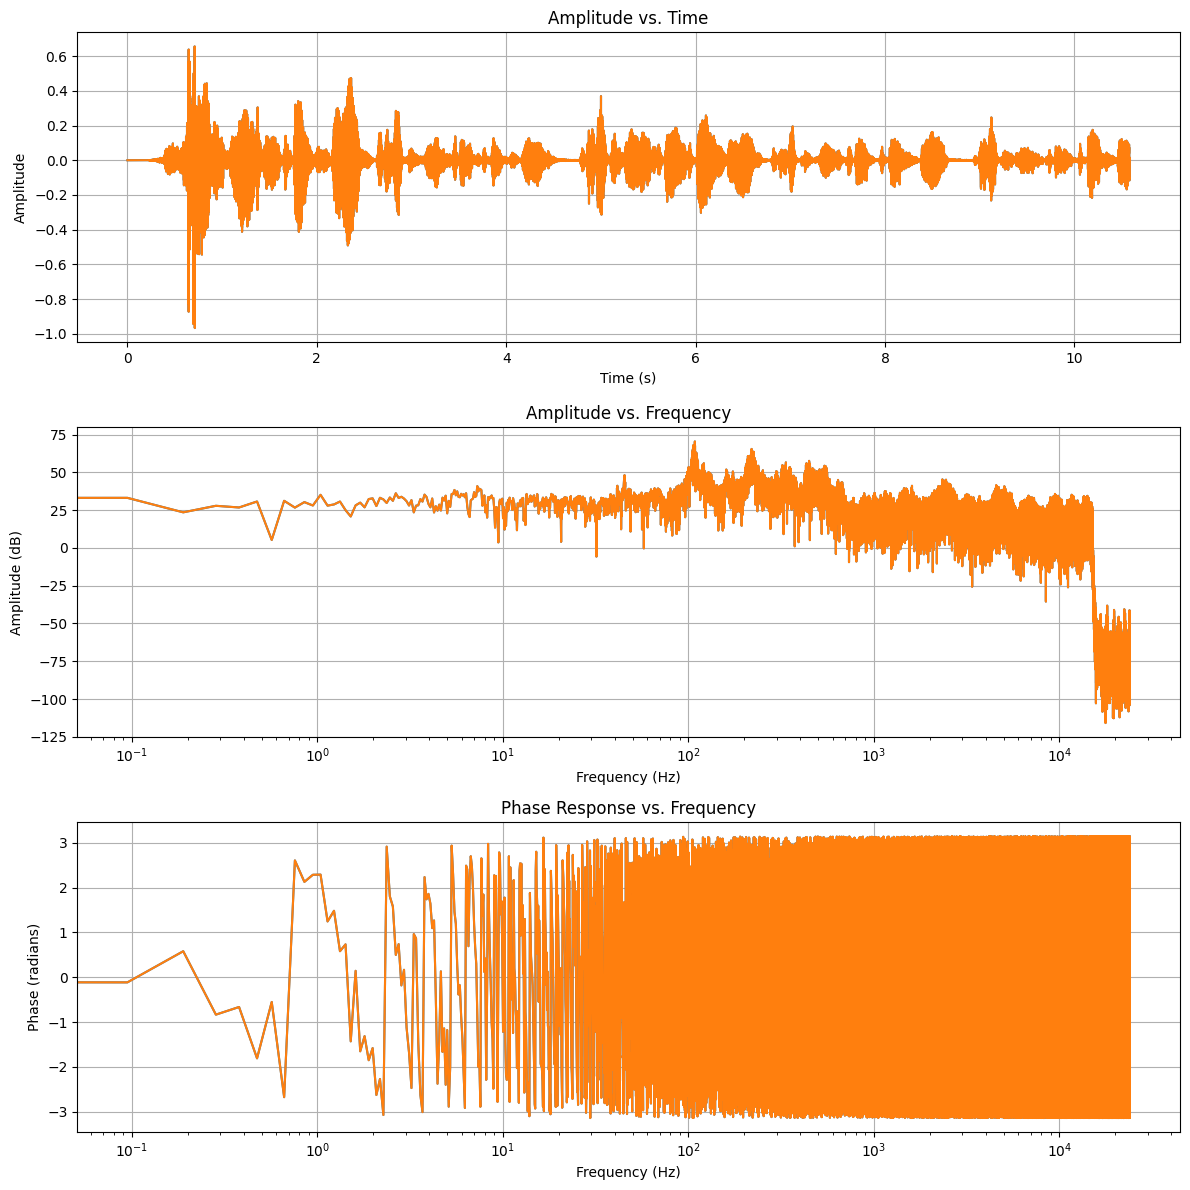

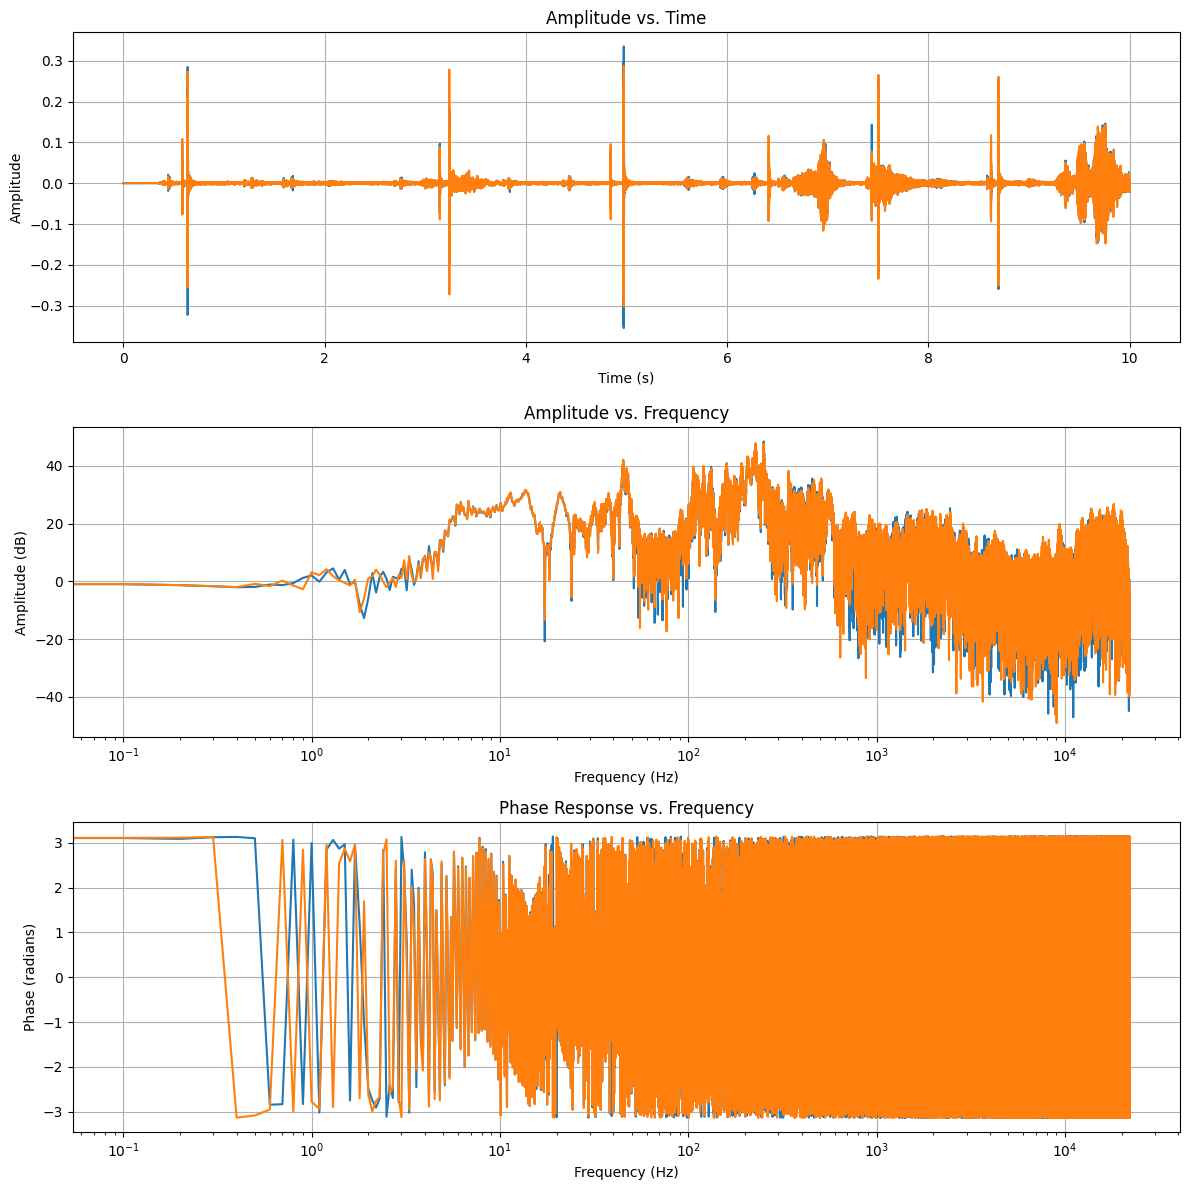

In [50]:
plot(data1,samples1,Fs1,time1)
plot(data2,samples2,Fs2,time2)